In [2]:
import nltk
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv("train_E6oV3lV.csv")
test = pd. read_csv("test_tweets_anuFYb8.csv")

In [4]:
train.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [5]:
print(f'Training data shape {train.shape}')
print(f'Testing data shape {test.shape}')

Training data shape (31962, 3)
Testing data shape (17197, 2)


Labels are missing in testing data hence, we will move forward with only training data. We will train the model by splitting the training data into train and test sets.

# Checking Positive and Negative Tweets

In [6]:
train_positive = train[train.label==0]
train_negative = train[train['label']==1]

print(f'Train positive shape {train_positive.shape}')
print(f'Train negative shape {train_negative.shape}')

Train positive shape (29720, 3)
Train negative shape (2242, 3)


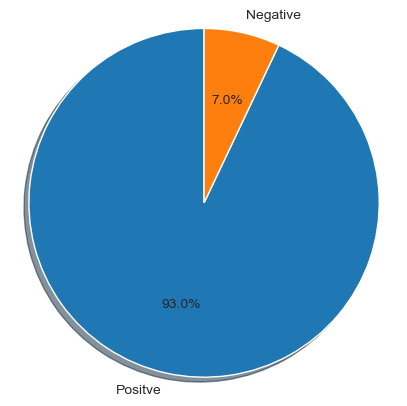

In [7]:
fig = plt.figure(figsize=(5,5))
labels = ['Positve', 'Negative']
# print(type(labels))
sizes = [train_positive.shape[0], train_negative.shape[0]]
plt.pie(sizes,labels=labels, autopct = '%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

Hence, the data is highly imbalanced and we need to perform under/over sampling.


In [8]:
# Checking null values
print(train.isnull().sum())

id       0
label    0
tweet    0
dtype: int64


In [9]:
# printing a random tweet
print(list(train_positive.sample().tweet))
print(list(train_negative.sample().tweet))

['@user @user  wait is becoming more and more difficult!  #ishqbaaz']
['@user @user @user only a racist would segregate people like you do. ']


# Pre-processing

The data needs to be cleaned by removing urls emoticons or any random characters which doesnt make sense.
Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming


In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a91946/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Selecting a random tweet and performing cleaning (example)

In [11]:
random.seed(300)
rand_val = np.random.randint(0,2242)
tweet= train.loc[rand_val].tweet

# tweet= train[['tweet']].iloc[rand_val]
print(tweet)

 â #nzd/usd: targets the 100 week sma at 0.7190   #blog #silver #gold #forex


In [12]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

# Remove special characters, URLs etc.

In [13]:
print('\033[92m' + tweet)
# print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+','',tweet)

# remove urls
tweet2 = re.sub(r'https?://[^\s\n\r]+','',tweet2)

#remove hashtags
tweet2 = re.sub(r'#','',tweet2)
tweet2 = re.sub(r'ð','',tweet2)

re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",tweet2)
print(tweet2)

 â #nzd/usd: targets the 100 week sma at 0.7190   #blog #silver #gold #forex
 â nzd/usd: targets the 100 week sma at 0.7190   blog silver gold forex


# Tokenize

In [14]:
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
tweet_token = tokenizer.tokenize(tweet2)

print(tweet_token)

['â', '\x86', '\x9d', 'nzd', '/', 'usd', ':', 'targets', 'the', '100', 'week', 'sma', 'at', '0.7190', 'blog', 'silver', 'gold', 'forex']


# Remove stopwords and punctuations

In [15]:
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [16]:
clean_tweet = []

for word in tweet_token:
    if (word not in stopwords_english and
            word not in string.punctuation):
        clean_tweet.append(word)

print(clean_tweet)

['â', '\x86', '\x9d', 'nzd', 'usd', 'targets', '100', 'week', 'sma', '0.7190', 'blog', 'silver', 'gold', 'forex']


# Stemming

In [17]:
stemmer = PorterStemmer()

stem_tweet=[]

for word in clean_tweet:
    stem_tweet.append(stemmer.stem(word.lower()))

print(stem_tweet)

['â', '\x86', '\x9d', 'nzd', 'usd', 'target', '100', 'week', 'sma', '0.7190', 'blog', 'silver', 'gold', 'forex']


In this way we can perform preprocessing for every tweet.

# Preprocessing function

In [18]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    tweet_token = tokenizer.tokenize(tweet)
    clean_tweet=[]
    for word in tweet_token:
        if (word not in stopwords_english and
                word not in string.punctuation):
            clean_tweet.append(stemmer.stem(word.lower()))

    return clean_tweet

In [19]:
#processing all tweets

train['processed_tweet'] = train['tweet'].apply(process_tweet)
print(train.head())


   id  label                                              tweet  \
0   1      0   @user when a father is dysfunctional and is s...   
1   2      0  @user @user thanks for #lyft credit i can't us...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                     processed_tweet  
0  [father, dysfunct, selfish, drag, kid, dysfunc...  
1  [thank, lyft, credit, can't, use, caus, offer,...  
2                                  [bihday, majesti]  
3  [model, love, u, take, u, time, urð, , , ±, ...  
4                        [factsguid, societi, motiv]  


# Counting unique words in tweets

In [20]:
freq_count=dict()

# for tweet in train['processed_tweet']:
#     for word in tweet:
#         if word not in freq_count.keys():
#             freq_count[word] = 1
#
#         else:
#             freq_count[word]+=1
#
# print(len(freq_count))

# create dictionary based on positive negative tweets
for y, tweet in zip(train['label'], train['processed_tweet']):
    for word in tweet:
        pair=(word,y)
        if pair not in freq_count.keys():
            freq_count[pair] = 1

        else:
            freq_count[pair]+=1

# print(len(freq_count))

Total 36691 unique elements

In [21]:
positv = pd.DataFrame(columns = ['word', 'count'])
negatv = pd.DataFrame(columns = ['word', 'count'])
pos_neg = pd.DataFrame(columns = ['word', 'count'])

for key, value in freq_count.items():
    if key[1]==1:
        positv.loc[len(positv.index)] = [key[0], value]
    else:
        negatv.loc[len(negatv.index)] = [key[0], value]

    if key[0] in pos_neg['word']:
        pos_neg[pos_neg['word']==key[0]].count+= value
    else:
        pos_neg.loc[len(pos_neg.index)] = [key[0], value]


In [22]:
positv.sort_values(by='count', inplace=True, ascending=False)
negatv.sort_values(by='count', inplace=True, ascending=False)
pos_neg.sort_values(by='count', inplace=True, ascending=False)

negatv.head()

,word,count
26,,17082
29,ð,15600
30,,7207
55,,5715
36,¦,5282


In [23]:
negatv.head(10)

,word,count
26,,17082
29,ð,15600
30,,7207
55,,5715
36,¦,5282
74,â,4260
35,,3171
21,love,3054
190,,2863
156,day,2746


In [24]:
import seaborn as sns

Text(0.5, 1.0, 'Most frequent words in Negative tweets')

/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


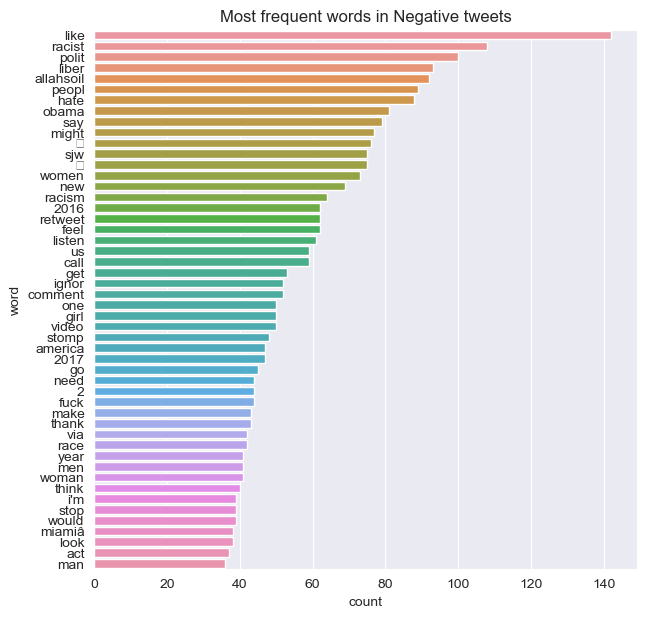

In [25]:
plt.figure(figsize=(7,7))
sns.barplot(data=positv.iloc[10:60], x= 'count', y= 'word')
plt.title('Most frequent words in Negative tweets')


Text(0.5, 1.0, 'Most frequent words in Positive tweets')

/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 152 (\x98) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 143 (\x8f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/c

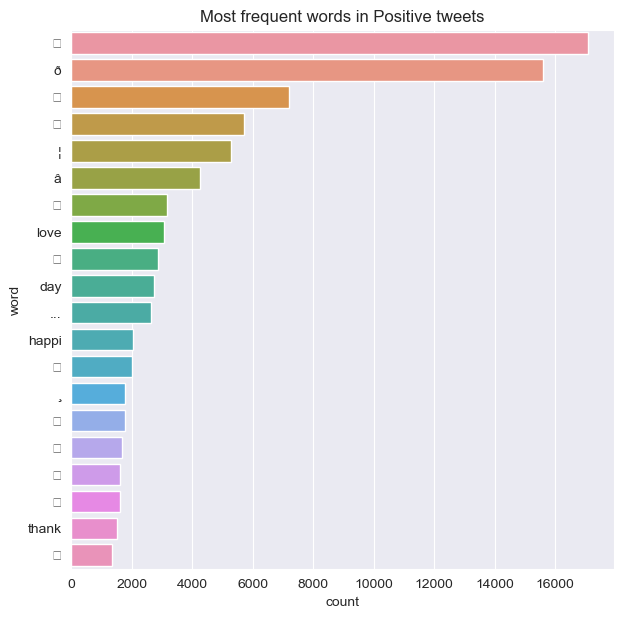

In [26]:
plt.figure(figsize=(7,7))
sns.barplot(data=negatv.head(20), x= 'count', y= 'word')
plt.title('Most frequent words in Positive tweets')

Text(0.5, 1.0, 'Most frequent words in all the tweets')

/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/a91946/opt/anaconda3/lib/python3.9/site-packages/IPython/c

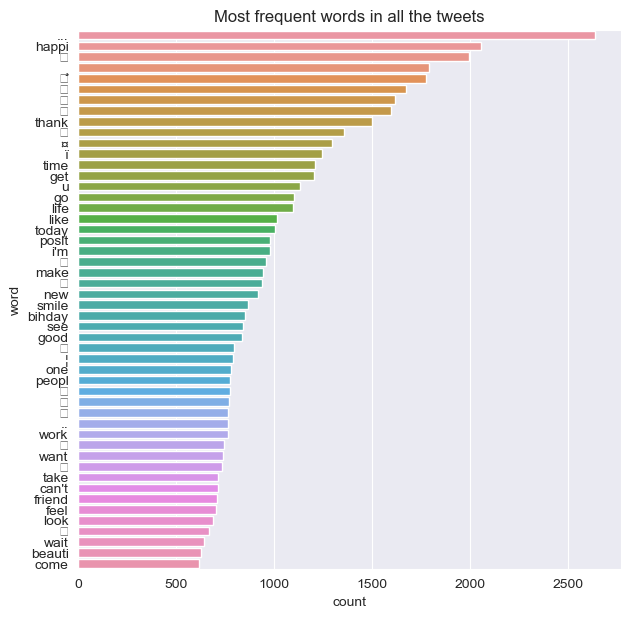

In [27]:
plt.figure(figsize=(7,7))
sns.barplot(data=pos_neg.iloc[10:60], x= 'count', y= 'word')
plt.title('Most frequent words in all the tweets')

# Oversampling to obtain Balanced dataset

In [28]:
from sklearn.model_selection import train_test_split

# since the data in imbalanced we need to perform oversampling. But before that we need to divide the data intro train and test sets

X_train, X_test, Y_train, Y_test = train_test_split(train.processed_tweet,train.label, test_size=0.2, random_state=1)

train_data = pd.DataFrame(X_train)
train_data['label']=pd.DataFrame(Y_train)
trainP = train_data[train_data.label==0]
trainN = train_data[train_data.label==1]

negative_oversample = trainN.sample(trainP.shape[0], replace=True)
negative_oversample.head()

train_oversample=pd.concat([trainP, negative_oversample],axis=0)
train_oversample.head()

,processed_tweet,label
2051,"[femal, worri, good, aâ, , , â, , , ð, , ...",0
20151,"[euro, 2016, marseil, england, russia, franc, ...",0
6595,"[ego, suppos, happen, happen, ..]",0
8676,"[love, puppi, ð, , , ©, ð, , , ¾, labicha,...",0
13588,"[lighttherapi, help, depress, altwaystoh, heal...",0


In [29]:
X_trainNew = train_oversample.processed_tweet.squeeze()
Y_trainNew = train_oversample.label.squeeze()

# print(X_train.dtype)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer

cv = CountVectorizer(stop_words='english')
transformer = TfidfTransformer()


In [31]:
X_train_counts = cv.fit_transform(X_trainNew.apply(lambda x: ' '.join(x)))
X_train_tfidf = transformer.fit_transform(X_train_counts)

X_test_counts = cv.transform(X_test.apply(lambda x: ' '.join(x)))
X_test_tfidf = transformer.transform(X_test_counts)

# Model Building

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import  svm
from sklearn import naive_bayes
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, classification_report

In [33]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train_tfidf,Y_trainNew)
predictions = LRmodel.predict(X_test_tfidf)

In [34]:
print('\033[91mLogistic Regression Fit Results \033[0m')
print('Accuracy', accuracy_score(Y_test,predictions))
print('f1 score', f1_score(Y_test,predictions))
print('Confusion Matrix: \n',confusion_matrix(Y_test,predictions))
print(classification_report(Y_test, predictions))

Logistic Regression Fit Results 
Accuracy 0.9440012513686845
f1 score 0.6564299424184261
Confusion Matrix: 
 [[5693  267]
 [  91  342]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5960
           1       0.56      0.79      0.66       433

    accuracy                           0.94      6393
   macro avg       0.77      0.87      0.81      6393
weighted avg       0.96      0.94      0.95      6393



In [35]:
SVmodel = svm.LinearSVC()
SVmodel.fit(X_train_tfidf,Y_trainNew)
predictions = SVmodel.predict(X_test_tfidf)

In [36]:
print('\033[91mSVM Fit Results \033[0m')
print('Accuracy', accuracy_score(Y_test,predictions))
print('f1 score', f1_score(Y_test,predictions))
print('Confusion Matrix: \n',confusion_matrix(Y_test,predictions))
print(classification_report(Y_test, predictions))

SVM Fit Results 
Accuracy 0.9538557797591115
f1 score 0.6696528555431132
Confusion Matrix: 
 [[5799  161]
 [ 134  299]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5960
           1       0.65      0.69      0.67       433

    accuracy                           0.95      6393
   macro avg       0.81      0.83      0.82      6393
weighted avg       0.96      0.95      0.95      6393



In [37]:
NBmodel = naive_bayes.MultinomialNB()
NBmodel.fit(X_train_tfidf,Y_trainNew)
predictions = NBmodel.predict(X_test_tfidf)

In [38]:
print('\033[91mNaive Bayes Fit Results \033[0m')
print('Accuracy', accuracy_score(Y_test,predictions))
print('f1 score', f1_score(Y_test,predictions))
print('Confusion Matrix: \n',confusion_matrix(Y_test,predictions))
print(classification_report(Y_test, predictions))

Naive Bayes Fit Results 
Accuracy 0.905834506491475
f1 score 0.5480480480480481
Confusion Matrix: 
 [[5426  534]
 [  68  365]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      5960
           1       0.41      0.84      0.55       433

    accuracy                           0.91      6393
   macro avg       0.70      0.88      0.75      6393
weighted avg       0.95      0.91      0.92      6393



In [39]:
RFmodel = RandomForestClassifier(n_estimators=500)
RFmodel.fit(X_train_tfidf,Y_trainNew)
predictions = RFmodel.predict(X_test_tfidf)

In [40]:
print('\033[91mRandom Forest Fit Results \033[0m')
print('Accuracy', accuracy_score(Y_test,predictions))
print('f1 score', f1_score(Y_test,predictions))
print('Confusion Matrix',confusion_matrix(Y_test,predictions))
print(classification_report(Y_test, predictions))

Random Forest Fit Results 
Accuracy 0.9527608321601752
f1 score 0.6488372093023256
Confusion Matrix [[5812  148]
 [ 154  279]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5960
           1       0.65      0.64      0.65       433

    accuracy                           0.95      6393
   macro avg       0.81      0.81      0.81      6393
weighted avg       0.95      0.95      0.95      6393



In [41]:
def predictNewReview():
    newReview = input("Type the Review: ")

    if newReview =='':
        print('Invalid Review')
    else:
        newReview = process_tweet(newReview)
        reviewVector = transformer.transform(cv.transform(newReview))
        prediction =  RFmodel.predict(reviewVector)
        if prediction[0] == 1:
            print( "Negative Review" )
        else:
            print( "Positive Review")


In [42]:
predictNewReview()

Positive Review


# Usinng Transformers

In [43]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [44]:
from transformers import DistilBertTokenizerFast
from transformers import Trainer, TrainingArguments

In [72]:
all_data=train[['tweet','label']]
x_train, x_test, y_train, y_test = train_test_split(all_data.tweet,all_data.label, test_size=0.2, random_state=1)

In [73]:
training_data = pd.DataFrame(x_train)
training_data['label'] = pd.DataFrame(y_train)
testing_data = pd.DataFrame(x_test)
testing_data['label'] = pd.DataFrame(y_test)

In [75]:
# Converting labels and tweets to list
tweets = training_data.tweet.to_list()
labels = training_data.label.to_list()

In [76]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
inputs= tokenizer(tweets,padding="max_length",truncation=True)

In [77]:
pip install torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 70.6/139.8 MB 3.4 MB/s eta 0:00:21^C
     ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 70.9/139.8 MB 3.3 MB/s eta 0:00:21
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.
